In [25]:
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,RandomForestClassifier,VotingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../csv/scaled_data.csv')
# use os to store csv file

x = df.drop(['Credit_Score'],axis=1)
column = x.columns
y = df["Credit_Score"]


In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)
des_tree = DecisionTreeClassifier(random_state=42)

In [16]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
hist_model = HistGradientBoostingClassifier(random_state=42)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
gb_model.fit(x_train, y_train)
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, gb_model.predict(x_test)))

Gradient Boosting Accuracy:  0.6772


In [13]:
hist_model.fit(x_train, y_train)
print("Hist Gradient Boosting Accuracy: ", accuracy_score(y_test, hist_model.predict(x_test)))

Hist Gradient Boosting Accuracy:  0.72755


In [12]:
rf_model.fit(x_train, y_train)
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_model.predict(x_test)))
et_model.fit(x_train, y_train)
print("Extra Trees Accuracy: ", accuracy_score(y_test, et_model.predict(x_test)))
knn_model.fit(x_train, y_train)
print("KNN Accuracy: ", accuracy_score(y_test, knn_model.predict(x_test)))
des_tree.fit(x_train, y_train)
print("Decision Tree Accuracy: ", accuracy_score(y_test, des_tree.predict(x_test)))

Random Forest Accuracy:  0.83105
Extra Trees Accuracy:  0.83065
KNN Accuracy:  0.8212
Decision Tree Accuracy:  0.8213


In [18]:
# confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, rf_model.predict(x_test)))
print("Classification Report: \n", classification_report(y_test, rf_model.predict(x_test)))

print("Confusion Matrix: \n", confusion_matrix(y_test, et_model.predict(x_test)))
print("Classification Report: \n", classification_report(y_test, et_model.predict(x_test)))

print("Confusion Matrix: \n", confusion_matrix(y_test, knn_model.predict(x_test)))
print("Classification Report: \n", classification_report(y_test, knn_model.predict(x_test)))

print("Confusion Matrix: \n", confusion_matrix(y_test, des_tree.predict(x_test)))
print("Classification Report: \n", classification_report(y_test, des_tree.predict(x_test)))

Confusion Matrix: 
 [[4875  996    3]
 [1015 8918  666]
 [   2  697 2828]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      5874
           1       0.84      0.84      0.84     10599
           2       0.81      0.80      0.81      3527

    accuracy                           0.83     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000

Confusion Matrix: 
 [[4875  997    2]
 [ 999 8939  661]
 [   2  726 2799]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      5874
           1       0.84      0.84      0.84     10599
           2       0.81      0.79      0.80      3527

    accuracy                           0.83     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000

Confusion Matrix: 
 [[5052  814    8]


In [22]:
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_model),
    ('Extra Trees', et_model),
    ("Decision Tree", des_tree),
    ("KNN", knn_model)
], voting='hard',weights=[1,1,1,1])
ensemble_model.fit(x_train, y_train)
print("Ensemble Accuracy: ", accuracy_score(y_test, ensemble_model.predict(x_test)))

Ensemble Accuracy:  0.83625


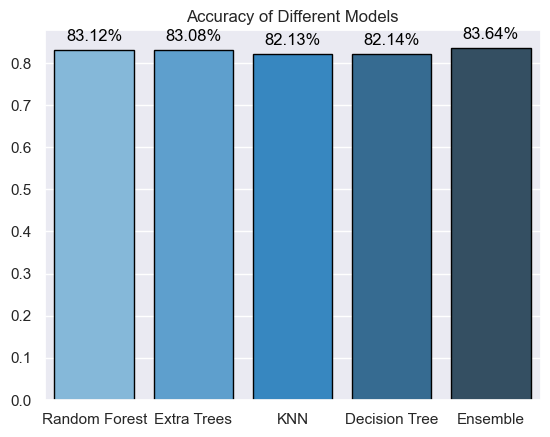

In [23]:
res_plot = pd.DataFrame({
    "Random Forest": [accuracy_score(y_test, rf_model.predict(x_test))],
    "Extra Trees": [accuracy_score(y_test, et_model.predict(x_test))],
    "KNN": [accuracy_score(y_test, knn_model.predict(x_test))],
    "Decision Tree": [accuracy_score(y_test, des_tree.predict(x_test))],
    'Ensemble': [accuracy_score(y_test, ensemble_model.predict(x_test))],
}, index=["Accuracy"])
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round((p.get_height()+.0001) * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models")
plt.show()

In [26]:
cross_val_rf = cross_val_predict(rf_model, x_train, y_train, cv=10)
cross_val_et = cross_val_predict(et_model, x_train, y_train, cv=10)
cross_val_knn = cross_val_predict(knn_model, x_train, y_train, cv=10)
cross_val_des = cross_val_predict(des_tree, x_train, y_train, cv=10)
cross_val_ensemble = cross_val_predict(ensemble_model, x_train, y_train, cv=10)

print(f"Random Forest Classifier Accuracy: {accuracy_score(y_train, cross_val_rf)}")
print(f"Extra Trees Classifier Accuracy: {accuracy_score(y_train, cross_val_et)}")
print(f"KNN Classifier Accuracy: {accuracy_score(y_train, cross_val_knn)}")
print(f"Ensemble Model Accuracy: {accuracy_score(y_train, cross_val_ensemble)}")
print(f"Decision Tree Accuracy: {accuracy_score(y_train, cross_val_des)}")

Random Forest Classifier Accuracy: 0.820825
Extra Trees Classifier Accuracy: 0.8217
KNN Classifier Accuracy: 0.812925
Ensemble Model Accuracy: 0.8243875
Decision Tree Accuracy: 0.80845


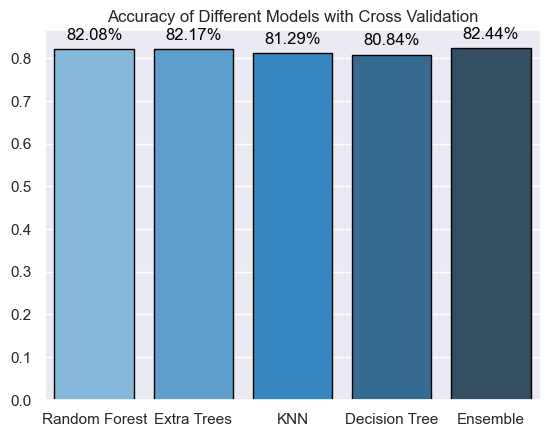

In [27]:
res_plot_vol = pd.DataFrame({
    "Random Forest": [accuracy_score(y_train, cross_val_rf)],
    "Extra Trees": [accuracy_score(y_train, cross_val_et)],
    "KNN": [accuracy_score(y_train, cross_val_knn)],
    "Decision Tree": [accuracy_score(y_train, cross_val_des)],
    "Ensemble": [accuracy_score(y_train, cross_val_ensemble)]
})
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot_vol, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round(p.get_height() * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models with Cross Validation")
plt.show()